In [1]:
# Library installation

!pip install textblob
!pip install scikit-plot

In [2]:
# Library Importation

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout
from keras.utils.vis_utils import plot_model
import scikitplot as skplt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, f1_score
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Downloading wordnet 

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
# Google drive folder path

drive_folder_path = "/content/drive/MyDrive/twitter"

In [5]:
# Tweets in 2020
df_2020 = pd.read_excel(drive_folder_path + os.sep + "health_services_01_01_2020_31_12_2020.xlsx")

# Tweets in 2021
df_2021 = pd.read_excel(drive_folder_path + os.sep + "health_services_01_01_2021_31_12_2021.xlsx")

# Tweets in 2022
df_2022 = pd.read_excel(drive_folder_path + os.sep + "health_services_01_01_2022_01_02_2022.xlsx")

In [6]:
# Shape of data frames with extracted tweets

print("Shape of tweets data frame 2020 : ", df_2020.shape)
print("Shape of tweets data frame 2021 : ", df_2021.shape)
print("Shape of tweets data frame 2022 : ", df_2022.shape)

Shape of tweets data frame 2020 :  (311569, 3)
Shape of tweets data frame 2021 :  (299719, 3)
Shape of tweets data frame 2022 :  (24507, 3)


In [7]:
# Data frame head 2020

df_2020.head(2)

,content,from_date,end_date
0,"""I officially don't have a therapist or psychi...",2020-01-01,2020-01-02
1,"'""It is reassuring that Congress recognizes th...",2020-01-01,2020-01-02


In [8]:
# Data frame head 2021

df_2021.head(2)

,content,from_date,end_date
0,'@gavreilly Isn’t it mad how all the politicia...,2021-01-01,2021-01-02
1,"'Give the 74,000,000 people who voted for him ...",2021-01-01,2021-01-02


In [9]:
# Data frame head 2022

df_2022.head(2)

,content,from_date,end_date
0,"""@Gofar_Hugo @doctor_oxford @CrowSaorAlba1 Whe...",2022-01-01,2022-01-02
1,'Poor health services department of victoria.....,2022-01-01,2022-01-02


In [10]:
# Data frame concatenation

health_services_df = pd.concat([df_2020, df_2021, df_2022], axis=0)

# Reset index
health_services_df = health_services_df.reset_index(drop = True)

In [11]:
# Shape of main data frame 

print("Shape of concatenated data frame : ", health_services_df.shape)

Shape of concatenated data frame :  (635795, 3)


In [12]:
# Main data frame head 2022

health_services_df.head()

,content,from_date,end_date
0,"""I officially don't have a therapist or psychi...",2020-01-01,2020-01-02
1,"'""It is reassuring that Congress recognizes th...",2020-01-01,2020-01-02
2,"'‘reach out for help’ is all anyone says, gett...",2020-01-01,2020-01-02
3,"'Mental health services failing vulnerable, wa...",2020-01-01,2020-01-02
4,'@mariejuku Are there any kind of in-person co...,2020-01-01,2020-01-02


In [13]:
# Tweets from the United Kingdom


# List of locations in UK
uk_locations = [' nhs ', 'united kingdom', 'unitedkingdom', 'england', 'scotland', 'wales', 'northern ireland', 'northernireland', 'britain', 
                'london', 'bristol', 'liverpool', 'birmingham', 'manchester', 'york', 'edinburgh', 'nottingham', 'oxford', 'cambridge', 'leeds',
                'leicester', 'glasgow', 'southampton', 'newcastle', 'cardiff', 'bath', 'brighton', 'plymouth', 'portsmouth', 'sheffield', 'derby', 
                'belfast', 'durham', 'coventry', 'canterbury', 'norwich', 'exeter', 'bradford', 'chester', 'peterborough', 'salisbury', 'sunderland',
                'wolverhampton', 'salford', 'albans', 'preston', 'winchester', 'aberdeen', 'lincoln', 'worcester', 'chelmsford', 'swansea', 'hereford',
                'gloucester', 'dundee', 'lisburn', 'wakefield']

# Tweet search from the UK locations
health_services_df = health_services_df[health_services_df["content"].str.lower().str.contains('|'.join(uk_locations))]

# Reset index
health_services_df = health_services_df.reset_index(drop = True)

In [14]:
# Filtered data frame shape

print("Shape of the data frame with required tweets : ", health_services_df.shape)

Shape of the data frame with required tweets :  (34052, 3)


In [15]:
# Function to clean text data

def text_clean(text):
  clean_text = text.str.lower().str.replace('[^a-z ]', '')
  return clean_text

In [16]:
# Cleaning the tweets with the defined text clean function

health_services_df["content"] = text_clean(health_services_df["content"])

# Head of cleaned text data frame
health_services_df.head(2)

,content,from_date,end_date
0,mralgolagnist kryptonite johnallman mmendiayeu...,2020-01-01,2020-01-02
1,if you your friends or family need urgent care...,2020-01-01,2020-01-02


In [17]:
# Defining a function to lemmatize text

lemmatizer = WordNetLemmatizer()

def row_lemmatizer(text_data):
  lem_text_list = [lemmatizer.lemmatize(word, pos = 'a') for word in text_data.split()]
  lem_text = ' '.join(lem_text_list)
  return lem_text

In [18]:
# Applying the lemmatization function on all the tweets

tweet_lem = []

for i in range(len(health_services_df)):
  tweet_lem_i = row_lemmatizer(health_services_df["content"][i])
  tweet_lem.append(tweet_lem_i)

In [19]:
# Assigning lemmatized text to data

health_services_df["content"] = tweet_lem

In [20]:
# Head of lemmatized text data frame

health_services_df.head(2)

,content,from_date,end_date
0,mralgolagnist kryptonite johnallman mmendiayeu...,2020-01-01,2020-01-02
1,if you your friends or family need urgent care...,2020-01-01,2020-01-02


In [21]:
# Data tagging by extracting the polarity score and polarity of the tweets

polarity_score = []
polarity = []
for i in range(len(health_services_df)):
  polarity_score_i = TextBlob(health_services_df["content"][i]).sentiment.polarity
  polarity_score.append(polarity_score_i)
  if polarity_score_i > 0:
    polarity.append("Positive")
  elif polarity_score_i < 0:
    polarity.append("Negative")
  else:
    polarity.append("Neutral")

In [22]:
# Adding polarity score as a column
health_services_df["polarity_score"] = polarity_score

# Adding polarity as a column
health_services_df["polarity"] = polarity

In [23]:
# Head of data tagged data frame

health_services_df.head(2)

,content,from_date,end_date,polarity_score,polarity
0,mralgolagnist kryptonite johnallman mmendiayeu...,2020-01-01,2020-01-02,0.334091,Positive
1,if you your friends or family need urgent care...,2020-01-01,2020-01-02,0.091667,Positive


In [24]:
# Tagged data frame shape

print("Shape of the tagged data frame : ", health_services_df.shape)

Shape of the tagged data frame :  (34052, 5)


In [25]:
# Data label encoding

health_services_df['Sentiment_label'] = health_services_df['polarity'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0})

In [26]:
# Label encoded data frame shape

print("Shape of the label encoded frame : ", health_services_df.shape)

Shape of the label encoded frame :  (34052, 6)


In [27]:
# Head of data label encoded data frame

health_services_df.head(2)

,content,from_date,end_date,polarity_score,polarity,Sentiment_label
0,mralgolagnist kryptonite johnallman mmendiayeu...,2020-01-01,2020-01-02,0.334091,Positive,2
1,if you your friends or family need urgent care...,2020-01-01,2020-01-02,0.091667,Positive,2


In [28]:
# Sentiment label analysis

health_services_df["Sentiment_label"].value_counts()

2    19889
0    10101
1     4062
Name: Sentiment_label, dtype: int64

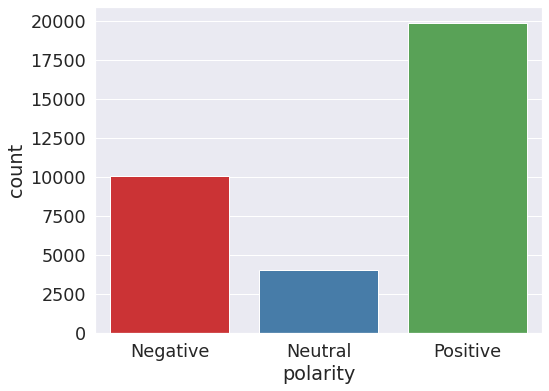

In [29]:
# PLotting the sentiment label counts

fig = plt.figure(figsize = (8, 6))
sns.set_style('darkgrid')
sns.set(font_scale = 1.6)

sns.countplot(x='polarity', data=health_services_df, palette="Set1", order = ["Negative", "Neutral", "Positive"])

In [30]:
# Polarity percentages

positive_tweets = len(health_services_df[health_services_df["polarity"] == "Positive"])/len(health_services_df)*100
print("Percentage of Positive Tweets : ", round(positive_tweets,2), "%")

negative_tweets = len(health_services_df[health_services_df["polarity"] == "Negative"])/len(health_services_df)*100
print("Percentage of Negative Tweets : ", round(negative_tweets,2), "%")

neutral_tweets = len(health_services_df[health_services_df["polarity"] == "Neutral"])/len(health_services_df)*100
print("Percentage of Neutral Tweets : ", round(neutral_tweets,2), "%")

Percentage of Positive Tweets :  58.41 %
Percentage of Negative Tweets :  29.66 %
Percentage of Neutral Tweets :  11.93 %


In [31]:
# Most number of tweets per day analysis

tweet_count = health_services_df["from_date"].value_counts()[:10]
tweet_count

2021-01-08    465
2021-07-05    132
2021-01-09    114
2020-01-30    113
2021-01-13     96
2020-04-20     90
2021-02-15     89
2020-03-26     83
2021-07-06     83
2021-02-16     81
Name: from_date, dtype: int64

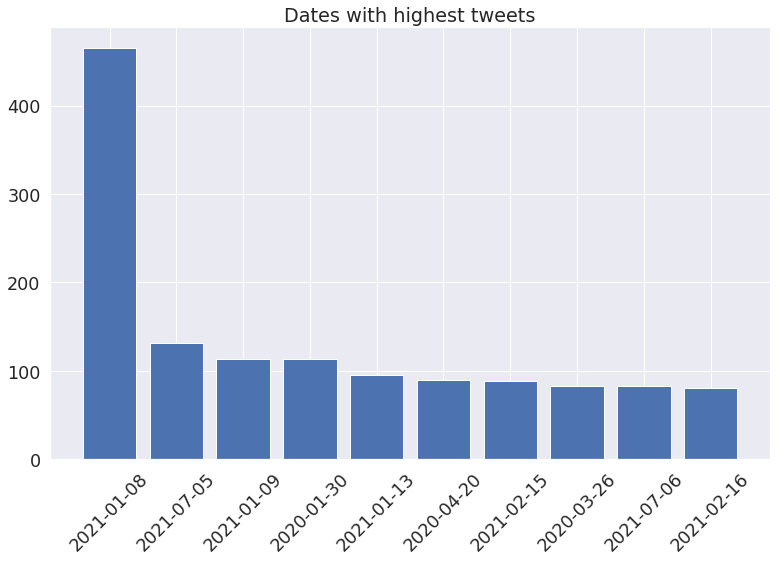

In [32]:
# Most number of tweets per day plot

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])

tweet_count = health_services_df["from_date"].value_counts()[:10]
tweet_date = health_services_df["from_date"].value_counts().index[:10]

ax.bar(tweet_date,tweet_count)
plt.title("Dates with highest tweets")
plt.xticks(rotation = 45)
plt.show()

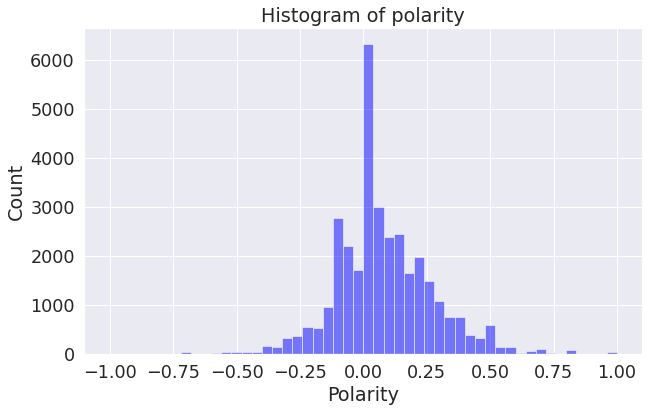

In [33]:
# Polarity distribution plot

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(health_services_df.polarity_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

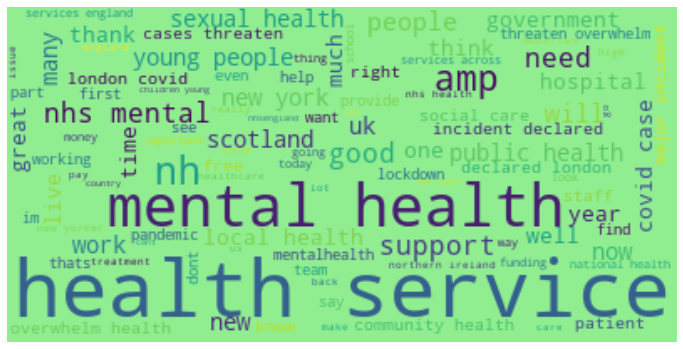

In [34]:
# Creating a wordcloud on tweets with Positive polarity

tweet_pos = health_services_df[health_services_df["polarity"] == "Positive"]["content"]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="lightgreen").generate(' '.join(tweet_pos))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

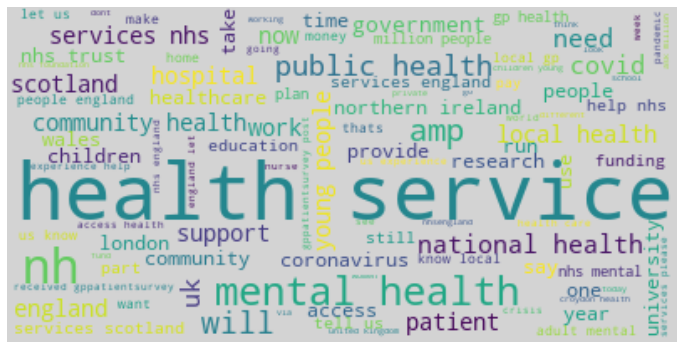

In [35]:
# Creating a wordcloud on tweets with Neutral polarity

tweet_neu = health_services_df[health_services_df["polarity"] == "Neutral"]["content"]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="lightgray").generate(' '.join(tweet_neu))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

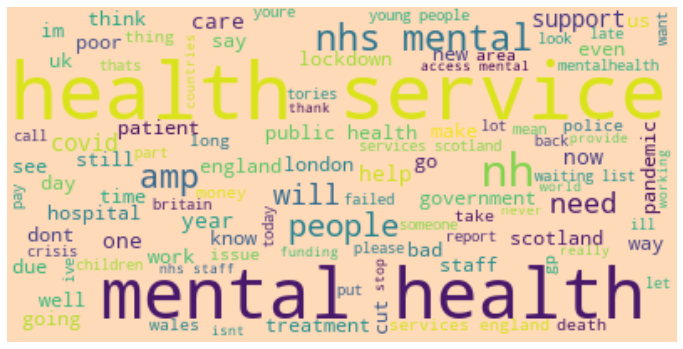

In [36]:
# Creating a wordcloud on tweets with Negative polarity

tweet_neg = health_services_df[health_services_df["polarity"] == "Negative"]["content"]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="peachpuff").generate(' '.join(tweet_neg))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
#TFIDF vectorizer

# Tfidf object creation

tfidfvect = TfidfVectorizer(max_features=1000)

# Fitting the tweet data on tfidf vectorizer

X_tweets = health_services_df['content']

X_tweets_tf = tfidfvect.fit_transform(X_tweets)

# Creating a dataframe with important features

X_tweet_tf_df = pd.DataFrame(X_tweets_tf.toarray(), columns = tfidfvect.get_feature_names())

In [38]:
# Head of TFIDF vectorized tweets

X_tweet_tf_df.head()

,aampe,ability,able,about,absolutely,abuse,access,accessible,accessing,according,...,yorkers,yorkshire,you,young,your,youre,yourself,youth,youve,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.161574,0.0,0.0,0.0,...,0.0,0.0,0.222619,0.0,0.137551,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.440382,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.228589,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
# Assigning average of priority score to important features

X_tweet_tf_df = X_tweet_tf_df.replace(0, np.NaN)
imp_features_value = X_tweet_tf_df.mean()
imp_features_value

aampe         0.267934
ability       0.287564
able          0.243357
about         0.169467
absolutely    0.291210
                ...   
youre         0.236279
yourself      0.303386
youth         0.304391
youve         0.289772
yrs           0.287049
Length: 1000, dtype: float64

In [40]:
# Important Features

imp_features = imp_features_value.index
imp_features

Index(['aampe', 'ability', 'able', 'about', 'absolutely', 'abuse', 'access',
       'accessible', 'accessing', 'according',
       ...
       'yorkers', 'yorkshire', 'you', 'young', 'your', 'youre', 'yourself',
       'youth', 'youve', 'yrs'],
      dtype='object', length=1000)

In [41]:
# Embedding the words in each tweet with their respective priority score

X_tweet_list = []

for i in range(len(health_services_df)):
  tweet_list = health_services_df['content'][i].split()
  X_tweet_list_i = []
  for j in tweet_list:
    if j in imp_features:
      imp_features_value_j = round((imp_features_value[j] * 100), 1)
      X_tweet_list_i.append(imp_features_value_j)
    else:
      X_tweet_list_i.append(0)
  X_tweet_list.append(X_tweet_list_i)

In [42]:
# tweet and priority score

temp_index = 4

print("Tweet information for index ", temp_index)
print()
print(X_tweets[temp_index])
print(X_tweet_list[temp_index])

Tweet information for index  4

justinwelby you criticised the one political leader who would have made a difference for the poor the sick and the elderly you helped bury jeremy corbyn and endorsed another years of tory policies that will no doubt wreck the nhs and further weaken social care and mental health services
[0, 16.9, 0, 13.1, 20.4, 29.1, 0, 17.8, 20.5, 14.0, 24.9, 0, 27.5, 12.5, 13.1, 26.7, 13.1, 28.8, 11.9, 13.1, 0, 16.9, 0, 0, 0, 0, 11.9, 0, 26.7, 20.9, 12.1, 26.1, 0, 14.7, 18.2, 20.1, 0, 0, 13.1, 10.9, 11.9, 28.0, 0, 21.9, 18.2, 11.9, 11.4, 6.5, 6.1]


In [43]:
# Independent variable 

# Padding the tweet sequences
X = pad_sequences(X_tweet_list)

In [44]:
# Dependent variable

# Creating 3 columns for the 3 sentiment labels
y = pd.get_dummies(health_services_df['Sentiment_label']).values

In [45]:
# Train test split with 20% test size

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Shape of train and test data 
print("Shape of independent train variable : ", X_train.shape)
print("Shape of dependent train variable : ", Y_train.shape)
print()
print("Shape of independent test variable : ", X_test.shape)
print("Shape of dependent test variable : ", Y_test.shape)

Shape of independent train variable :  (27241, 103)
Shape of dependent train variable :  (27241, 3)

Shape of independent test variable :  (6811, 103)
Shape of dependent test variable :  (6811, 3)


In [46]:
# Dependent test variable in single column for calculating evaluation metrics

Y_test_actual = []

for i in range(len(Y_test)):
  if Y_test[i][0] == 1:
    Y_test_actual.append(0)
  elif Y_test[i][1] == 1:
    Y_test_actual.append(1)
  elif Y_test[i][2] == 1:
    Y_test_actual.append(2)

### LSTM Model 1

In [47]:
# LSTM units = 32, LSTM activation = 'relu', Output activation = 'sigmoid'

# Model initialization
lstm_model_1 = Sequential()

# Adding the embedding layer
lstm_model_1.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_1.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 32 units
lstm_model_1.add(LSTM(32, recurrent_dropout=0.15, activation= 'relu'))

# Adding the Dropout layer
lstm_model_1.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_1.add(Dense(3,activation='sigmoid'))

In [48]:
# Summary of the model
print(lstm_model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 103, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 148,707
Trainable params: 148,707
Non-trainable params: 0
__________________________________________________

In [49]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [50]:
# Fitting the train data on the LSTM model

lstm_model_1.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 27s - loss: 0.9212 - accuracy: 0.5863 - 27s/epoch - 125ms/step
Epoch 2/10
213/213 - 25s - loss: 38.4490 - accuracy: 0.5880 - 25s/epoch - 116ms/step
Epoch 3/10
213/213 - 24s - loss: 0.9152 - accuracy: 0.5846 - 24s/epoch - 115ms/step
Epoch 4/10
213/213 - 25s - loss: 0.9040 - accuracy: 0.5846 - 25s/epoch - 115ms/step
Epoch 5/10
213/213 - 25s - loss: 0.9037 - accuracy: 0.5855 - 25s/epoch - 116ms/step
Epoch 6/10
213/213 - 25s - loss: 0.9040 - accuracy: 0.5858 - 25s/epoch - 118ms/step
Epoch 7/10
213/213 - 25s - loss: 0.9052 - accuracy: 0.5866 - 25s/epoch - 119ms/step
Epoch 8/10
213/213 - 26s - loss: 0.9017 - accuracy: 0.5880 - 26s/epoch - 121ms/step
Epoch 9/10
213/213 - 27s - loss: 0.9041 - accuracy: 0.5856 - 27s/epoch - 125ms/step
Epoch 10/10
213/213 - 28s - loss: 0.9027 - accuracy: 0.5857 - 28s/epoch - 129ms/step


In [51]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_1.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 3s 13ms/step - loss: 0.9012 - accuracy: 0.5748
Accuracy of test data :  0.5748054385185242


In [52]:
# Prediction on Test data

lstm_model_1_pred = lstm_model_1.predict(X_test).argmax(axis=1)

In [53]:
# Printing classification report

seg_clf_report_1 = classification_report(Y_test_actual, lstm_model_1_pred)
print(seg_clf_report_1)

              precision    recall  f1-score   support

           0       0.27      0.00      0.01      2046
           1       1.00      0.00      0.01       847
           2       0.58      1.00      0.73      3918

    accuracy                           0.57      6811
   macro avg       0.62      0.33      0.25      6811
weighted avg       0.54      0.57      0.42      6811



In [54]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_1_pred)

array([[   6,    0, 2040],
       [   4,    3,  840],
       [  12,    0, 3906]])

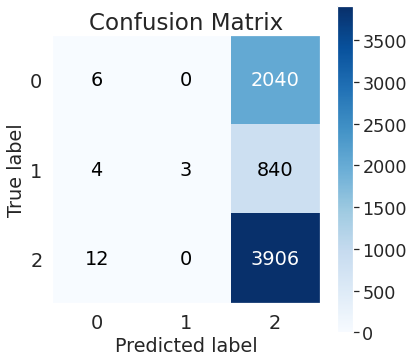

In [55]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_1_pred, figsize=(6,6))

### LSTM Model 2

In [56]:
# LSTM units = 32, LSTM activation = 'relu', Output activation = 'softmax'

# Model initialization
lstm_model_2 = Sequential()

# Adding the embedding layer
lstm_model_2.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_2.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 32 units
lstm_model_2.add(LSTM(32, recurrent_dropout=0.15, activation= 'relu'))

# Adding the Dropout layer
lstm_model_2.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_2.add(Dense(3,activation='softmax'))

In [57]:
# Summary of the model
print(lstm_model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 148,707
Trainable params: 148,707
Non-trainable params: 0
________________________________________________

In [58]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [59]:
# Fitting the train data on the LSTM model

lstm_model_2.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 30s - loss: 0.9261 - accuracy: 0.5852 - 30s/epoch - 139ms/step
Epoch 2/10
213/213 - 27s - loss: 0.8971 - accuracy: 0.5874 - 27s/epoch - 127ms/step
Epoch 3/10
213/213 - 26s - loss: 0.9542 - accuracy: 0.5950 - 26s/epoch - 124ms/step
Epoch 4/10
213/213 - 27s - loss: 0.8774 - accuracy: 0.6017 - 27s/epoch - 127ms/step
Epoch 5/10
213/213 - 28s - loss: 0.8722 - accuracy: 0.5995 - 28s/epoch - 132ms/step
Epoch 6/10
213/213 - 28s - loss: 0.8674 - accuracy: 0.6021 - 28s/epoch - 133ms/step
Epoch 7/10
213/213 - 29s - loss: 0.8624 - accuracy: 0.6064 - 29s/epoch - 136ms/step
Epoch 8/10
213/213 - 29s - loss: 0.8555 - accuracy: 0.6081 - 29s/epoch - 137ms/step
Epoch 9/10
213/213 - 30s - loss: 0.8477 - accuracy: 0.6103 - 30s/epoch - 139ms/step
Epoch 10/10
213/213 - 29s - loss: 0.8401 - accuracy: 0.6149 - 29s/epoch - 137ms/step


In [60]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_2.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 3s 14ms/step - loss: 0.8329 - accuracy: 0.6199
Accuracy of test data :  0.6198796033859253


In [61]:
# Prediction on Test data

lstm_model_2_pred = lstm_model_2.predict(X_test).argmax(axis=1)

In [62]:
# Printing classification report

seg_clf_report_2 = classification_report(Y_test_actual, lstm_model_2_pred)
print(seg_clf_report_2)

              precision    recall  f1-score   support

           0       0.55      0.31      0.40      2046
           1       0.70      0.17      0.28       847
           2       0.63      0.88      0.73      3918

    accuracy                           0.62      6811
   macro avg       0.63      0.45      0.47      6811
weighted avg       0.62      0.62      0.58      6811



In [63]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_2_pred)

array([[ 638,   13, 1395],
       [  84,  147,  616],
       [ 431,   50, 3437]])

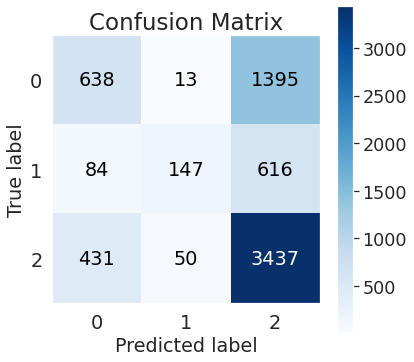

In [64]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_2_pred, figsize=(6,6))

### LSTM Model 3

In [65]:
# LSTM units = 32, LSTM activation = 'tanh', Output activation = 'sigmoid'

# Model initialization
lstm_model_3 = Sequential()

# Adding the embedding layer
lstm_model_3.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_3.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 32 units
lstm_model_3.add(LSTM(32, recurrent_dropout=0.15, activation= 'tanh'))

# Adding the Dropout layer
lstm_model_3.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_3.add(Dense(3,activation='sigmoid'))

In [66]:
# Summary of the model
print(lstm_model_3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 148,707
Trainable params: 148,707
Non-trainable params: 0
________________________________________________

In [67]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [68]:
# Fitting the train data on the LSTM model

lstm_model_3.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 32s - loss: 0.9129 - accuracy: 0.5878 - 32s/epoch - 149ms/step
Epoch 2/10
213/213 - 29s - loss: 0.8776 - accuracy: 0.5966 - 29s/epoch - 135ms/step
Epoch 3/10
213/213 - 27s - loss: 0.8682 - accuracy: 0.6031 - 27s/epoch - 128ms/step
Epoch 4/10
213/213 - 28s - loss: 0.8570 - accuracy: 0.6105 - 28s/epoch - 132ms/step
Epoch 5/10
213/213 - 31s - loss: 0.8416 - accuracy: 0.6179 - 31s/epoch - 144ms/step
Epoch 6/10
213/213 - 31s - loss: 0.8307 - accuracy: 0.6218 - 31s/epoch - 145ms/step
Epoch 7/10
213/213 - 29s - loss: 0.8251 - accuracy: 0.6228 - 29s/epoch - 136ms/step
Epoch 8/10
213/213 - 31s - loss: 0.8176 - accuracy: 0.6239 - 31s/epoch - 146ms/step
Epoch 9/10
213/213 - 30s - loss: 0.8160 - accuracy: 0.6277 - 30s/epoch - 141ms/step
Epoch 10/10
213/213 - 30s - loss: 0.8123 - accuracy: 0.6267 - 30s/epoch - 142ms/step


In [69]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_3.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 4s 15ms/step - loss: 0.8062 - accuracy: 0.6296
Accuracy of test data :  0.6295698285102844


In [70]:
# Prediction on Test data

lstm_model_3_pred = lstm_model_3.predict(X_test).argmax(axis=1)

In [71]:
# Printing classification report

seg_clf_report_3 = classification_report(Y_test_actual, lstm_model_3_pred)
print(seg_clf_report_3)

              precision    recall  f1-score   support

           0       0.59      0.33      0.42      2046
           1       0.67      0.21      0.32       847
           2       0.64      0.88      0.74      3918

    accuracy                           0.63      6811
   macro avg       0.63      0.47      0.49      6811
weighted avg       0.63      0.63      0.59      6811



In [72]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_3_pred)

array([[ 679,   20, 1347],
       [  58,  179,  610],
       [ 418,   70, 3430]])

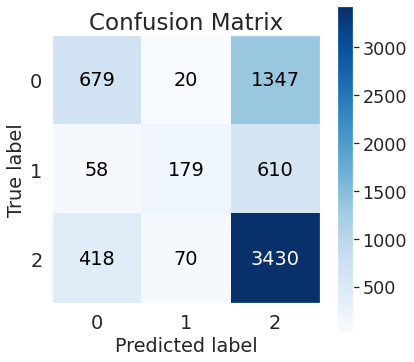

In [73]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_3_pred, figsize=(6,6))

### LSTM Model 4

In [74]:
# LSTM units = 32, LSTM activation = 'tanh', Output activation = 'softmax'

# Model initialization
lstm_model_4 = Sequential()

# Adding the embedding layer
lstm_model_4.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_4.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 32 units
lstm_model_4.add(LSTM(32, recurrent_dropout=0.15, activation= 'tanh'))

# Adding the Dropout layer
lstm_model_4.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_4.add(Dense(3,activation='softmax'))

In [75]:
# Summary of the model
print(lstm_model_4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 148,707
Trainable params: 148,707
Non-trainable params: 0
________________________________________________

In [76]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [77]:
# Fitting the train data on the LSTM model

lstm_model_4.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 32s - loss: 0.9098 - accuracy: 0.5873 - 32s/epoch - 152ms/step
Epoch 2/10
213/213 - 31s - loss: 0.8784 - accuracy: 0.5985 - 31s/epoch - 147ms/step
Epoch 3/10
213/213 - 28s - loss: 0.8685 - accuracy: 0.6012 - 28s/epoch - 131ms/step
Epoch 4/10
213/213 - 30s - loss: 0.8591 - accuracy: 0.6083 - 30s/epoch - 142ms/step
Epoch 5/10
213/213 - 30s - loss: 0.8468 - accuracy: 0.6151 - 30s/epoch - 142ms/step
Epoch 6/10
213/213 - 30s - loss: 0.8323 - accuracy: 0.6184 - 30s/epoch - 143ms/step
Epoch 7/10
213/213 - 31s - loss: 0.8228 - accuracy: 0.6230 - 31s/epoch - 144ms/step
Epoch 8/10
213/213 - 31s - loss: 0.8178 - accuracy: 0.6244 - 31s/epoch - 143ms/step
Epoch 9/10
213/213 - 31s - loss: 0.8134 - accuracy: 0.6274 - 31s/epoch - 146ms/step
Epoch 10/10
213/213 - 31s - loss: 0.8083 - accuracy: 0.6270 - 31s/epoch - 147ms/step


In [78]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_4.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 4s 15ms/step - loss: 0.8106 - accuracy: 0.6253
Accuracy of test data :  0.6253119707107544


In [79]:
# Prediction on Test data

lstm_model_4_pred = lstm_model_4.predict(X_test).argmax(axis=1)

In [80]:
# Printing classification report

seg_clf_report_4 = classification_report(Y_test_actual, lstm_model_4_pred)
print(seg_clf_report_4)

              precision    recall  f1-score   support

           0       0.55      0.36      0.44      2046
           1       0.71      0.23      0.35       847
           2       0.64      0.85      0.73      3918

    accuracy                           0.63      6811
   macro avg       0.63      0.48      0.50      6811
weighted avg       0.62      0.63      0.59      6811



In [81]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_4_pred)

array([[ 739,   20, 1287],
       [  75,  196,  576],
       [ 532,   62, 3324]])

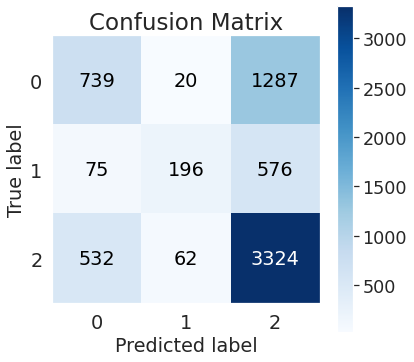

In [82]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_4_pred, figsize=(6,6))

### LSTM Model 5

In [83]:
# LSTM units = 64, LSTM activation = 'relu', Output activation = 'sigmoid'

# Model initialization
lstm_model_5 = Sequential()

# Adding the embedding layer
lstm_model_5.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_5.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 64 units
lstm_model_5.add(LSTM(64, recurrent_dropout=0.15, activation= 'relu'))

# Adding the Dropout layer
lstm_model_5.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_5.add(Dense(3,activation='sigmoid'))

In [84]:
# Summary of the model
print(lstm_model_5.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 177,603
Trainable params: 177,603
Non-trainable params: 0
________________________________________________

In [85]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_5.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [86]:
# Fitting the train data on the LSTM model

lstm_model_5.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 44s - loss: 1.7720 - accuracy: 0.5840 - 44s/epoch - 206ms/step
Epoch 2/10
213/213 - 42s - loss: 0.9353 - accuracy: 0.5863 - 42s/epoch - 197ms/step
Epoch 3/10
213/213 - 41s - loss: 0.9236 - accuracy: 0.5863 - 41s/epoch - 194ms/step
Epoch 4/10
213/213 - 41s - loss: 0.9157 - accuracy: 0.5862 - 41s/epoch - 194ms/step
Epoch 5/10
213/213 - 42s - loss: 12.8928 - accuracy: 0.5866 - 42s/epoch - 195ms/step
Epoch 6/10
213/213 - 41s - loss: 0.9235 - accuracy: 0.5862 - 41s/epoch - 195ms/step
Epoch 7/10
213/213 - 42s - loss: 0.9210 - accuracy: 0.5861 - 42s/epoch - 195ms/step
Epoch 8/10
213/213 - 41s - loss: 0.9196 - accuracy: 0.5861 - 41s/epoch - 193ms/step
Epoch 9/10
213/213 - 42s - loss: 0.9205 - accuracy: 0.5858 - 42s/epoch - 199ms/step
Epoch 10/10
213/213 - 42s - loss: 0.9195 - accuracy: 0.5861 - 42s/epoch - 195ms/step


In [87]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_5.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 4s 18ms/step - loss: 0.9304 - accuracy: 0.5750
Accuracy of test data :  0.5749523043632507


In [88]:
# Prediction on Test data

lstm_model_5_pred = lstm_model_5.predict(X_test).argmax(axis=1)

In [89]:
# Printing classification report

seg_clf_report_5 = classification_report(Y_test_actual, lstm_model_5_pred)
print(seg_clf_report_5)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2046
           1       0.00      0.00      0.00       847
           2       0.58      1.00      0.73      3918

    accuracy                           0.57      6811
   macro avg       0.19      0.33      0.24      6811
weighted avg       0.33      0.57      0.42      6811



In [90]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_5_pred)

array([[   0,    0, 2046],
       [   0,    0,  847],
       [   0,    2, 3916]])

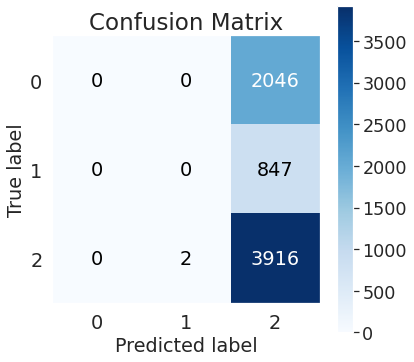

In [91]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_5_pred, figsize=(6,6))

### LSTM Model 6

In [92]:
# LSTM units = 64, LSTM activation = 'relu', Output activation = 'softmax'

# Model initialization
lstm_model_6 = Sequential()

# Adding the embedding layer
lstm_model_6.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_6.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 64 units
lstm_model_6.add(LSTM(64, recurrent_dropout=0.15, activation= 'relu'))

# Adding the Dropout layer
lstm_model_6.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_6.add(Dense(3,activation='softmax'))

In [93]:
# Summary of the model
print(lstm_model_6.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 177,603
Trainable params: 177,603
Non-trainable params: 0
________________________________________________

In [94]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_6.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [95]:
# Fitting the train data on the LSTM model

lstm_model_6.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 44s - loss: 0.9352 - accuracy: 0.5842 - 44s/epoch - 206ms/step
Epoch 2/10
213/213 - 42s - loss: 0.8972 - accuracy: 0.5865 - 42s/epoch - 195ms/step
Epoch 3/10
213/213 - 41s - loss: 0.8890 - accuracy: 0.5881 - 41s/epoch - 193ms/step
Epoch 4/10
213/213 - 42s - loss: 0.9091 - accuracy: 0.5898 - 42s/epoch - 195ms/step
Epoch 5/10
213/213 - 42s - loss: 0.8966 - accuracy: 0.5925 - 42s/epoch - 196ms/step
Epoch 6/10
213/213 - 43s - loss: 0.8797 - accuracy: 0.5943 - 43s/epoch - 201ms/step
Epoch 7/10
213/213 - 42s - loss: 0.8709 - accuracy: 0.5999 - 42s/epoch - 197ms/step
Epoch 8/10
213/213 - 41s - loss: 0.8607 - accuracy: 0.6048 - 41s/epoch - 191ms/step
Epoch 9/10
213/213 - 41s - loss: 0.8447 - accuracy: 0.6150 - 41s/epoch - 195ms/step
Epoch 10/10
213/213 - 41s - loss: 0.8313 - accuracy: 0.6190 - 41s/epoch - 193ms/step


In [96]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_6.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 4s 18ms/step - loss: 0.8294 - accuracy: 0.6241
Accuracy of test data :  0.6241374015808105


In [97]:
# Prediction on Test data

lstm_model_6_pred = lstm_model_6.predict(X_test).argmax(axis=1)

In [98]:
# Printing classification report

seg_clf_report_6 = classification_report(Y_test_actual, lstm_model_6_pred)
print(seg_clf_report_6)

              precision    recall  f1-score   support

           0       0.58      0.33      0.42      2046
           1       0.79      0.14      0.24       847
           2       0.63      0.88      0.73      3918

    accuracy                           0.62      6811
   macro avg       0.66      0.45      0.47      6811
weighted avg       0.63      0.62      0.58      6811



In [99]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_6_pred)

array([[ 679,    8, 1359],
       [  59,  121,  667],
       [ 442,   25, 3451]])

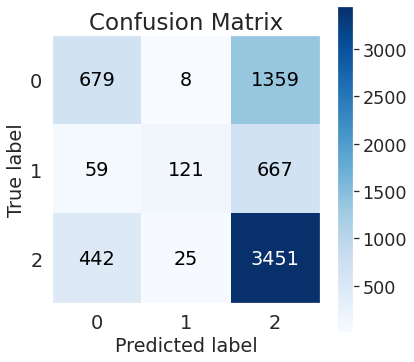

In [100]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_6_pred, figsize=(6,6))

### LSTM Model 7

In [101]:
# LSTM units = 64, LSTM activation = 'tanh', Output activation = 'sigmoid'

# Model initialization
lstm_model_7 = Sequential()

# Adding the embedding layer
lstm_model_7.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_7.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 64 units
lstm_model_7.add(LSTM(64, recurrent_dropout=0.15, activation= 'tanh'))

# Adding the Dropout layer
lstm_model_7.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_7.add(Dense(3,activation='sigmoid'))

In [102]:
# Summary of the model
print(lstm_model_7.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 177,603
Trainable params: 177,603
Non-trainable params: 0
________________________________________________

In [103]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_7.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [104]:
# Fitting the train data on the LSTM model

lstm_model_7.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 44s - loss: 0.9026 - accuracy: 0.5899 - 44s/epoch - 205ms/step
Epoch 2/10
213/213 - 42s - loss: 0.8739 - accuracy: 0.6005 - 42s/epoch - 199ms/step
Epoch 3/10
213/213 - 43s - loss: 0.8667 - accuracy: 0.6023 - 43s/epoch - 200ms/step
Epoch 4/10
213/213 - 42s - loss: 0.8482 - accuracy: 0.6129 - 42s/epoch - 198ms/step
Epoch 5/10
213/213 - 41s - loss: 0.8282 - accuracy: 0.6226 - 41s/epoch - 195ms/step
Epoch 6/10
213/213 - 39s - loss: 0.8190 - accuracy: 0.6246 - 39s/epoch - 185ms/step
Epoch 7/10
213/213 - 40s - loss: 0.8105 - accuracy: 0.6271 - 40s/epoch - 186ms/step
Epoch 8/10
213/213 - 40s - loss: 0.8059 - accuracy: 0.6294 - 40s/epoch - 186ms/step
Epoch 9/10
213/213 - 38s - loss: 0.7992 - accuracy: 0.6334 - 38s/epoch - 179ms/step
Epoch 10/10
213/213 - 38s - loss: 0.7952 - accuracy: 0.6317 - 38s/epoch - 179ms/step


In [105]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_7.evaluate(X_test,Y_test)[1])


213/213 [==============================] - 4s 18ms/step - loss: 0.7952 - accuracy: 0.6369
Accuracy of test data :  0.6369108557701111


In [106]:
# Prediction on Test data

lstm_model_7_pred = lstm_model_7.predict(X_test).argmax(axis=1)

In [107]:
# Printing classification report

seg_clf_report_7 = classification_report(Y_test_actual, lstm_model_7_pred)
print(seg_clf_report_7)

              precision    recall  f1-score   support

           0       0.61      0.33      0.43      2046
           1       0.64      0.26      0.37       847
           2       0.64      0.88      0.74      3918

    accuracy                           0.64      6811
   macro avg       0.63      0.49      0.51      6811
weighted avg       0.63      0.64      0.60      6811



In [108]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_7_pred)

array([[ 669,   30, 1347],
       [  50,  224,  573],
       [ 379,   94, 3445]])

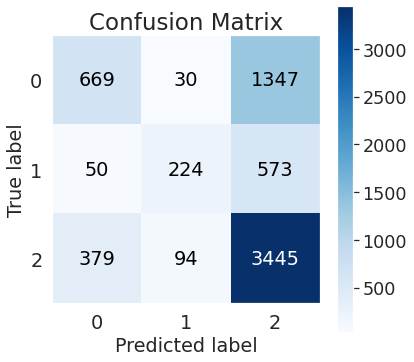

In [109]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_7_pred, figsize=(6,6))

### LSTM Model 8

In [110]:
# LSTM units = 64, LSTM activation = 'tanh', Output activation = 'softmax'

# Model initialization
lstm_model_8 = Sequential()

# Adding the embedding layer
lstm_model_8.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_8.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 64 units
lstm_model_8.add(LSTM(64, recurrent_dropout=0.15, activation= 'tanh'))

# Adding the Dropout layer
lstm_model_8.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_8.add(Dense(3,activation='softmax'))

In [111]:
# Summary of the model
print(lstm_model_8.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 177,603
Trainable params: 177,603
Non-trainable params: 0
________________________________________________

In [112]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_8.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [113]:
# Fitting the train data on the LSTM model

lstm_model_8.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 41s - loss: 0.9066 - accuracy: 0.5908 - 41s/epoch - 192ms/step
Epoch 2/10
213/213 - 37s - loss: 0.8766 - accuracy: 0.5976 - 37s/epoch - 173ms/step
Epoch 3/10
213/213 - 38s - loss: 0.8673 - accuracy: 0.6040 - 38s/epoch - 177ms/step
Epoch 4/10
213/213 - 39s - loss: 0.8532 - accuracy: 0.6106 - 39s/epoch - 184ms/step
Epoch 5/10
213/213 - 40s - loss: 0.8300 - accuracy: 0.6176 - 40s/epoch - 186ms/step
Epoch 6/10
213/213 - 40s - loss: 0.8187 - accuracy: 0.6236 - 40s/epoch - 186ms/step
Epoch 7/10
213/213 - 40s - loss: 0.8141 - accuracy: 0.6281 - 40s/epoch - 186ms/step
Epoch 8/10
213/213 - 39s - loss: 0.8052 - accuracy: 0.6309 - 39s/epoch - 185ms/step
Epoch 9/10
213/213 - 39s - loss: 0.7995 - accuracy: 0.6313 - 39s/epoch - 183ms/step
Epoch 10/10
213/213 - 40s - loss: 0.7941 - accuracy: 0.6336 - 40s/epoch - 187ms/step


In [114]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_8.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 4s 19ms/step - loss: 0.7998 - accuracy: 0.6227
Accuracy of test data :  0.6226692199707031


In [115]:
# Prediction on Test data

lstm_model_8_pred = lstm_model_8.predict(X_test).argmax(axis=1)

In [116]:
# Printing classification report

seg_clf_report_8 = classification_report(Y_test_actual, lstm_model_8_pred)
print(seg_clf_report_8)

              precision    recall  f1-score   support

           0       0.62      0.20      0.31      2046
           1       0.63      0.25      0.36       847
           2       0.62      0.92      0.74      3918

    accuracy                           0.62      6811
   macro avg       0.62      0.46      0.47      6811
weighted avg       0.62      0.62      0.56      6811



In [117]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_8_pred)

array([[ 416,   29, 1601],
       [  45,  212,  590],
       [ 208,   97, 3613]])

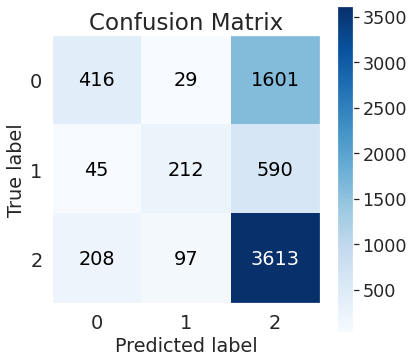

In [118]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_8_pred, figsize=(6,6))

### LSTM Model 9

In [119]:
# LSTM units = 128, LSTM activation = 'relu', Output activation = 'sigmoid'

# Model initialization
lstm_model_9 = Sequential()

# Adding the embedding layer
lstm_model_9.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_9.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 128 units
lstm_model_9.add(LSTM(128, recurrent_dropout=0.15, activation= 'relu'))

# Adding the Dropout layer
lstm_model_9.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_9.add(Dense(3,activation='sigmoid'))

In [120]:
# Summary of the model
print(lstm_model_9.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 259,971
Trainable params: 259,971
Non-trainable params: 0
________________________________________________

In [121]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_9.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [122]:
# Fitting the train data on the LSTM model

lstm_model_9.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 56s - loss: 55940.5781 - accuracy: 0.5836 - 56s/epoch - 261ms/step
Epoch 2/10
213/213 - 53s - loss: 0.9377 - accuracy: 0.5863 - 53s/epoch - 248ms/step
Epoch 3/10
213/213 - 52s - loss: 0.9294 - accuracy: 0.5863 - 52s/epoch - 244ms/step
Epoch 4/10
213/213 - 52s - loss: 0.9278 - accuracy: 0.5864 - 52s/epoch - 244ms/step
Epoch 5/10
213/213 - 52s - loss: 0.9262 - accuracy: 0.5862 - 52s/epoch - 244ms/step
Epoch 6/10
213/213 - 52s - loss: 0.9274 - accuracy: 0.5863 - 52s/epoch - 245ms/step
Epoch 7/10
213/213 - 50s - loss: 0.9223 - accuracy: 0.5863 - 50s/epoch - 237ms/step
Epoch 8/10
213/213 - 51s - loss: 0.9182 - accuracy: 0.5863 - 51s/epoch - 240ms/step
Epoch 9/10
213/213 - 52s - loss: 0.9153 - accuracy: 0.5861 - 52s/epoch - 244ms/step
Epoch 10/10
213/213 - 54s - loss: 0.9146 - accuracy: 0.5862 - 54s/epoch - 255ms/step


In [123]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_9.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 6s 28ms/step - loss: 0.9252 - accuracy: 0.5750
Accuracy of test data :  0.5749523043632507


In [124]:
# Prediction on Test data

lstm_model_9_pred = lstm_model_9.predict(X_test).argmax(axis=1)

In [125]:
# Printing classification report

seg_clf_report_9 = classification_report(Y_test_actual, lstm_model_9_pred)
print(seg_clf_report_9)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2046
           1       0.00      0.00      0.00       847
           2       0.58      1.00      0.73      3918

    accuracy                           0.57      6811
   macro avg       0.19      0.33      0.24      6811
weighted avg       0.33      0.57      0.42      6811



In [126]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_9_pred)

array([[   0,    0, 2046],
       [   0,    0,  847],
       [   0,    2, 3916]])

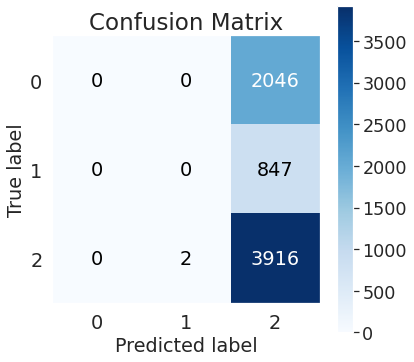

In [127]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_9_pred, figsize=(6,6))

### LSTM Model 10

In [128]:
# LSTM units = 128, LSTM activation = 'relu', Output activation = 'softmax'

# Model initialization
lstm_model_10 = Sequential()

# Adding the embedding layer
lstm_model_10.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_10.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 128 units
lstm_model_10.add(LSTM(128, recurrent_dropout=0.15, activation= 'relu'))

# Adding the Dropout layer
lstm_model_10.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_10.add(Dense(3,activation='softmax'))

In [129]:
# Summary of the model
print(lstm_model_10.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_9 (Spatia  (None, 103, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 259,971
Trainable params: 259,971
Non-trainable params: 0
________________________________________________

In [130]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_10.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [131]:
# Fitting the train data on the LSTM model

lstm_model_10.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 60s - loss: 0.9225 - accuracy: 0.5851 - 60s/epoch - 280ms/step
Epoch 2/10
213/213 - 54s - loss: 0.9462 - accuracy: 0.5836 - 54s/epoch - 255ms/step
Epoch 3/10
213/213 - 54s - loss: 6157.2197 - accuracy: 0.5867 - 54s/epoch - 254ms/step
Epoch 4/10
213/213 - 54s - loss: 0.9211 - accuracy: 0.5863 - 54s/epoch - 253ms/step
Epoch 5/10
213/213 - 54s - loss: 0.9195 - accuracy: 0.5863 - 54s/epoch - 255ms/step
Epoch 6/10
213/213 - 54s - loss: 0.9191 - accuracy: 0.5863 - 54s/epoch - 252ms/step
Epoch 7/10
213/213 - 54s - loss: 0.9157 - accuracy: 0.5863 - 54s/epoch - 254ms/step
Epoch 8/10
213/213 - 54s - loss: 0.9115 - accuracy: 0.5862 - 54s/epoch - 254ms/step
Epoch 9/10
213/213 - 54s - loss: 0.9067 - accuracy: 0.5868 - 54s/epoch - 252ms/step
Epoch 10/10
213/213 - 54s - loss: 0.9035 - accuracy: 0.5867 - 54s/epoch - 252ms/step


In [132]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_10.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 6s 27ms/step - loss: 0.9074 - accuracy: 0.5757
Accuracy of test data :  0.5756863951683044


In [133]:
# Prediction on Test data

lstm_model_10_pred = lstm_model_10.predict(X_test).argmax(axis=1)

In [134]:
# Printing classification report

seg_clf_report_10 = classification_report(Y_test_actual, lstm_model_10_pred)
print(seg_clf_report_10)

              precision    recall  f1-score   support

           0       0.33      0.00      0.01      2046
           1       0.38      0.00      0.01       847
           2       0.58      1.00      0.73      3918

    accuracy                           0.58      6811
   macro avg       0.43      0.34      0.25      6811
weighted avg       0.48      0.58      0.42      6811



In [135]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_10_pred)

array([[   8,    3, 2035],
       [  10,    3,  834],
       [   6,    2, 3910]])

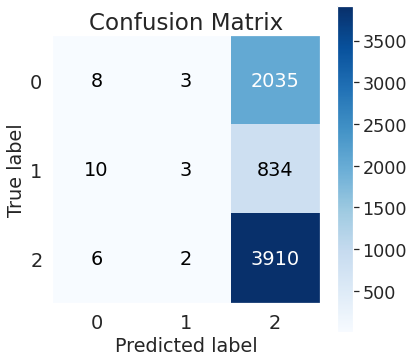

In [136]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_10_pred, figsize=(6,6))

### LSTM Model 11

In [137]:
# LSTM units = 128, LSTM activation = 'tanh', Output activation = 'sigmoid'

# Model initialization
lstm_model_11 = Sequential()

# Adding the embedding layer
lstm_model_11.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_11.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 128 units
lstm_model_11.add(LSTM(128, recurrent_dropout=0.15, activation= 'tanh'))

# Adding the Dropout layer
lstm_model_11.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_11.add(Dense(3,activation='sigmoid'))

In [138]:
# Summary of the model
print(lstm_model_11.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_10 (Spati  (None, 103, 128)         0         
 alDropout1D)                                                    
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 3)                 387       
                                                                 
Total params: 259,971
Trainable params: 259,971
Non-trainable params: 0
_______________________________________________

In [139]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [140]:
# Fitting the train data on the LSTM model

lstm_model_11.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 57s - loss: 0.9041 - accuracy: 0.5879 - 57s/epoch - 267ms/step
Epoch 2/10
213/213 - 55s - loss: 0.8741 - accuracy: 0.6006 - 55s/epoch - 258ms/step
Epoch 3/10
213/213 - 54s - loss: 0.8640 - accuracy: 0.6057 - 54s/epoch - 256ms/step
Epoch 4/10
213/213 - 54s - loss: 0.8396 - accuracy: 0.6143 - 54s/epoch - 254ms/step
Epoch 5/10
213/213 - 55s - loss: 0.8212 - accuracy: 0.6232 - 55s/epoch - 256ms/step
Epoch 6/10
213/213 - 54s - loss: 0.8128 - accuracy: 0.6288 - 54s/epoch - 252ms/step
Epoch 7/10
213/213 - 54s - loss: 0.8050 - accuracy: 0.6274 - 54s/epoch - 255ms/step
Epoch 8/10
213/213 - 55s - loss: 0.7997 - accuracy: 0.6304 - 55s/epoch - 257ms/step
Epoch 9/10
213/213 - 55s - loss: 0.7936 - accuracy: 0.6345 - 55s/epoch - 256ms/step
Epoch 10/10
213/213 - 54s - loss: 0.7876 - accuracy: 0.6342 - 54s/epoch - 253ms/step


In [141]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_11.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 6s 27ms/step - loss: 0.7961 - accuracy: 0.6329
Accuracy of test data :  0.6329467296600342


In [142]:
# Prediction on Test data

lstm_model_11_pred = lstm_model_11.predict(X_test).argmax(axis=1)

In [143]:
# Printing classification report

seg_clf_report_11 = classification_report(Y_test_actual, lstm_model_11_pred)
print(seg_clf_report_11)

              precision    recall  f1-score   support

           0       0.64      0.26      0.37      2046
           1       0.63      0.27      0.38       847
           2       0.63      0.91      0.75      3918

    accuracy                           0.63      6811
   macro avg       0.63      0.48      0.50      6811
weighted avg       0.63      0.63      0.59      6811



In [144]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_11_pred)

array([[ 531,   39, 1476],
       [  34,  227,  586],
       [ 269,   96, 3553]])

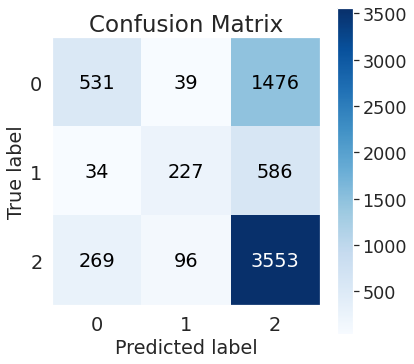

In [145]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_11_pred, figsize=(6,6))

### LSTM Model 12

In [146]:
# LSTM units = 128, LSTM activation = 'tanh', Output activation = 'sigmoid'

# Model initialization
lstm_model_12 = Sequential()

# Adding the embedding layer
lstm_model_12.add(Embedding(len(imp_features), 128, input_length = X_train.shape[1]))

# Droping 1D feature maps at a rate of 0.2 
lstm_model_12.add(SpatialDropout1D(0.2))

# Adding the LSTM layer with 128 units
lstm_model_12.add(LSTM(128, recurrent_dropout=0.15, activation= 'tanh'))

# Adding the Dropout layer
lstm_model_12.add(Dropout(0.2))

# Adding Dense layer to connect every neuron in the LSTM layer to generate the output
lstm_model_12.add(Dense(3,activation='softmax'))

In [147]:
# Summary of the model
print(lstm_model_12.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 103, 128)          128000    
                                                                 
 spatial_dropout1d_11 (Spati  (None, 103, 128)         0         
 alDropout1D)                                                    
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 259,971
Trainable params: 259,971
Non-trainable params: 0
_______________________________________________

In [148]:
# Model compilation with loss and optimizer taking accuracy as a metric

lstm_model_12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [149]:
# Fitting the train data on the LSTM model

lstm_model_12.fit(X_train, Y_train, epochs = 10, batch_size= 128, verbose = 2)

Epoch 1/10
213/213 - 57s - loss: 0.9086 - accuracy: 0.5878 - 57s/epoch - 269ms/step
Epoch 2/10
213/213 - 55s - loss: 0.8731 - accuracy: 0.5998 - 55s/epoch - 257ms/step
Epoch 3/10
213/213 - 55s - loss: 0.8625 - accuracy: 0.6053 - 55s/epoch - 257ms/step
Epoch 4/10
213/213 - 54s - loss: 0.8394 - accuracy: 0.6143 - 54s/epoch - 255ms/step
Epoch 5/10
213/213 - 55s - loss: 0.8222 - accuracy: 0.6234 - 55s/epoch - 256ms/step
Epoch 6/10
213/213 - 54s - loss: 0.8114 - accuracy: 0.6273 - 54s/epoch - 254ms/step
Epoch 7/10
213/213 - 55s - loss: 0.8042 - accuracy: 0.6327 - 55s/epoch - 257ms/step
Epoch 8/10
213/213 - 55s - loss: 0.7991 - accuracy: 0.6300 - 55s/epoch - 257ms/step
Epoch 9/10
213/213 - 56s - loss: 0.8025 - accuracy: 0.6295 - 56s/epoch - 261ms/step
Epoch 10/10
213/213 - 54s - loss: 0.7946 - accuracy: 0.6322 - 54s/epoch - 255ms/step


In [150]:
# Accuracy of Test data

print("Accuracy of test data : ", lstm_model_12.evaluate(X_test,Y_test)[1])

213/213 [==============================] - 6s 27ms/step - loss: 0.7929 - accuracy: 0.6363
Accuracy of test data :  0.6363235712051392


In [151]:
# Prediction on Test data

lstm_model_12_pred = lstm_model_12.predict(X_test).argmax(axis=1)

In [152]:
# Printing classification report

seg_clf_report_12 = classification_report(Y_test_actual, lstm_model_12_pred)
print(seg_clf_report_12)

              precision    recall  f1-score   support

           0       0.64      0.28      0.39      2046
           1       0.74      0.21      0.33       847
           2       0.63      0.92      0.75      3918

    accuracy                           0.64      6811
   macro avg       0.67      0.47      0.49      6811
weighted avg       0.65      0.64      0.59      6811



In [153]:
# Confusion matrix

confusion_matrix(Y_test_actual, lstm_model_12_pred)

array([[ 568,   17, 1461],
       [  39,  180,  628],
       [ 285,   47, 3586]])

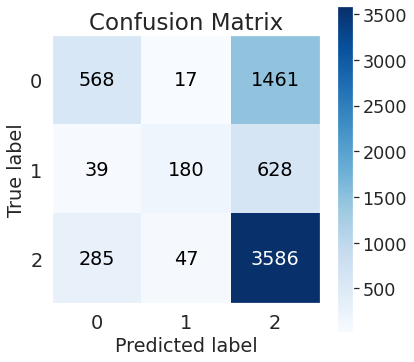

In [154]:
# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(Y_test_actual, lstm_model_12_pred, figsize=(6,6))

### Model evaluation metrics

In [165]:
# List of predictions on test data by the 12 models 

lstm_preds = [lstm_model_1_pred, lstm_model_2_pred, lstm_model_3_pred, lstm_model_4_pred, lstm_model_5_pred, lstm_model_6_pred,
              lstm_model_7_pred, lstm_model_8_pred, lstm_model_9_pred, lstm_model_10_pred, lstm_model_11_pred, lstm_model_12_pred]

In [166]:
# Empty data frame creation with required metrics
result_df = pd.DataFrame(columns=["LSTM model", "Accuracy", "Recall", "F1 score"])

# Iteration on every model and appending metrics to the data frame
for i in range(len(lstm_preds)):
  acc_i = round(accuracy_score(Y_test_actual, lstm_preds[i]), 3)
  rec_i = round(recall_score(Y_test_actual, lstm_preds[i], average = "weighted"), 3)
  f1_i = round(f1_score(Y_test_actual, lstm_preds[i], average = "weighted"), 3)
  result_df = result_df.append({
      "LSTM model"   :   "lstm_model_" + str(i + 1),
      "Accuracy"     :   acc_i,
      "Recall"       :   rec_i,
      "F1 score"     :   f1_i
  }, ignore_index = True)

# Sorting the result data frame on 'F1' score
result_df.sort_values("F1 score", ascending= False)

,LSTM model,Accuracy,Recall,F1 score
6,lstm_model_7,0.637,0.637,0.601
3,lstm_model_4,0.625,0.625,0.594
2,lstm_model_3,0.630,0.630,0.591
11,lstm_model_12,0.636,0.636,0.587
10,lstm_model_11,0.633,0.633,0.586
5,lstm_model_6,0.624,0.624,0.579
1,lstm_model_2,0.620,0.620,0.577
7,lstm_model_8,0.623,0.623,0.564
9,lstm_model_10,0.576,0.576,0.424
0,lstm_model_1,0.575,0.575,0.422


### Model Selection

#### Predictions from the **LSTM model 7**, with hyper parameters 
#### *LSTM units = **64** ,*
#### *LSTM activation = **'tanh'** ,* 
#### *Output activation = **'sigmoid'** ,* 
#### performed well on analyzing the tweets sentiment with an accuracy of **63.7%** and F1 score of **60.1%**